<a href="https://colab.research.google.com/github/iarora697/Codsoft-Task/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries for data processing

---








In [2]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [3]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import sklearn

In [4]:
print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))

Python: 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
Pandas: 2.0.3
Numpy: 1.25.2
Matplotlib: 3.7.1
Scikit-learn: 1.2.2


In [5]:
file_path = 'IRIS.csv'
data = pd.read_csv(file_path)

data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
data.shape

(150, 5)

# ***Data Pre-Processing***

---



In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### ***Creating a bar chart to see the count of species category***

---



<ipython-input-10-bd3639bff88b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=data, palette="Set2")


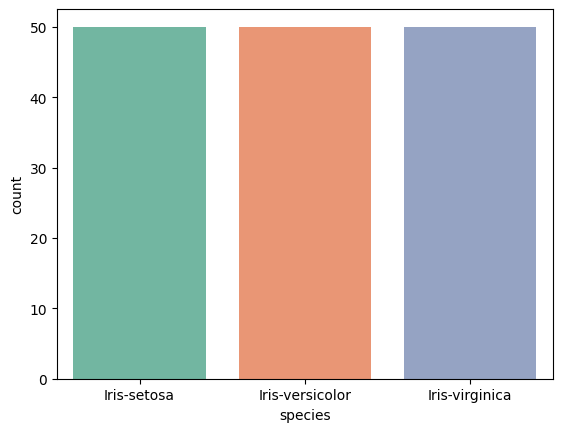

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use a suitable Seaborn plotting function, e.g., countplot for categorical data
sns.countplot(x='species', data=data, palette="Set2")
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

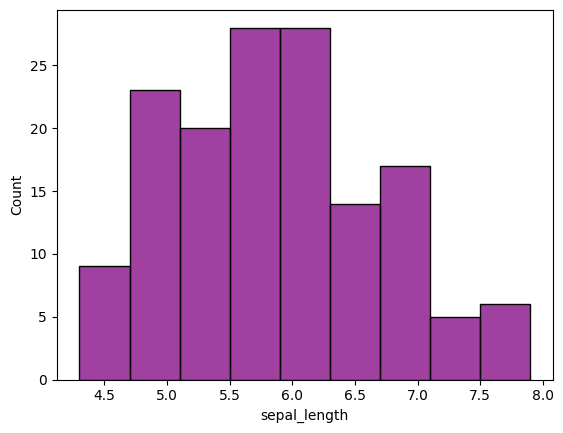

In [11]:
sns.histplot(data = data , x = data.sepal_length, color = 'purple')

<Axes: xlabel='sepal_width', ylabel='Count'>

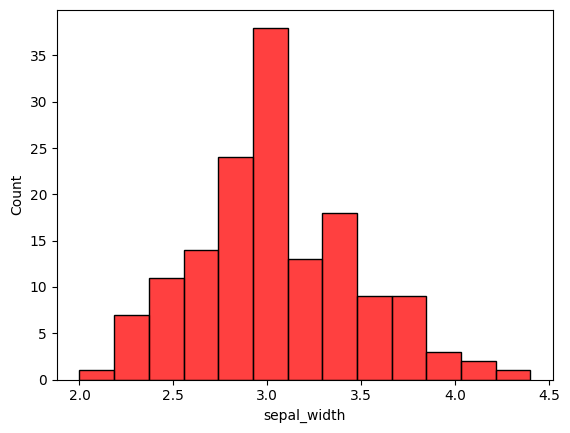

In [12]:
sns.histplot(data = data , x = data.sepal_width, color = 'red')

<Axes: xlabel='petal_length', ylabel='Count'>

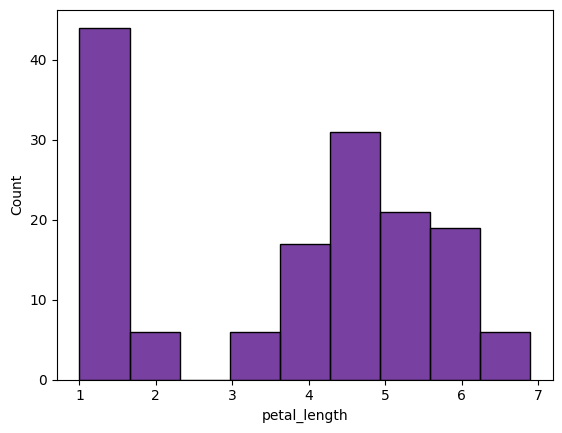

In [13]:
sns.histplot(data = data , x = data.petal_length, color = 'indigo')

<Axes: xlabel='petal_width', ylabel='Count'>

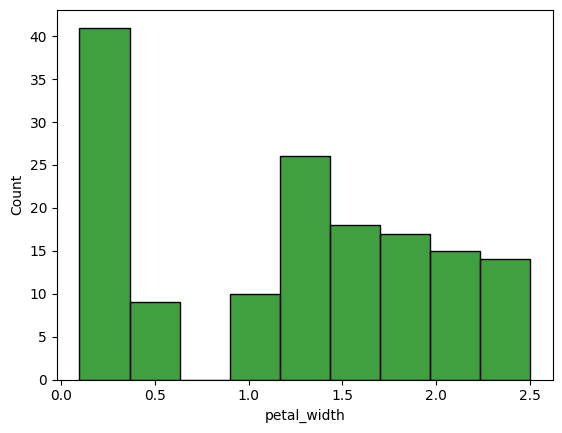

In [14]:
sns.histplot(data = data , x = data.petal_width, color = 'green')

<Axes: >

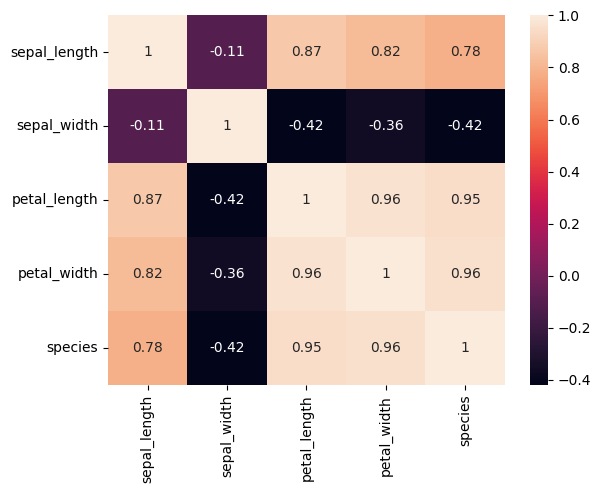

In [15]:
# Convert the species column to a numerical representation
data['species'] = data['species'].astype('category').cat.codes

# Calculate the correlation matrix
corr = data.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True)

# ***Data Preparation***

---



In [18]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = data['species']

In [19]:
Y = pd.factorize(Y)[0]
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Now you can use the train_test_split function

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit and transform on training data
X_test = scaler.transform(X_test) # Transform test data based on training data fit

# ***Model Building***

---



In [27]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

Model = LogisticRegression()
Model.fit(X_train, Y_train)

LogisticRegression()

In [28]:
print("Score for train data", Model.score(X_train, Y_train))
print("Score for train data", Model.score(X_test, Y_test))

Score for train data 0.9619047619047619
Score for train data 1.0


In [29]:
# Import the necessary class
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [30]:
# Import the necessary class
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 # Import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(Y_test, Y_pred))

print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# ***Model Testing***

---



In [31]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
data  = {'sepal_length': [5.2], 'sepal_width': [3.6], 'petal_length': [1.4], 'petal_width': [2.4]}
trail = pd.DataFrame(data)

In [33]:
result = clf.predict(trail)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [34]:
print("Result Species:", result[0])

Result Species: 2
